In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pickle

with open('df2.data','rb') as data:
    df = pickle.load(data)
df

,Caracter del procedimiento,Forma del procedimiento,Operador,Correo electronico,Entidad federativa,Tipo de contratacion,Articulo,Plantilla,Forma_Procedimiento_Presencial,Forma_Procedimiento_Electronica,...,Most_used_description_word_servici,Most_used_description_word_adquisicion,Most_used_description_word_material,Mes_pub,Dia_pub,Hora_pub,Min_pub,Most_used_UC_word_gyr,Most_used_UC_word_material,Most_used_UC_word_general
0,nacional,presencial,gabriel caamal caamal,cozumel,sur,obra publica,NaN,licitacion,1,0,...,0,0,0,8,10,12,49,0,0,0
1,nacional,presencial,gabriel caamal caamal,cozumel,sur,adquisiciones,NaN,licitacion,1,0,...,0,1,0,8,14,11,19,0,0,0
2,NaN,NaN,adriana ortega gonzalez,salamanca,bajio,servicios relacionados con la op,43,adjudicacion,0,0,...,0,0,0,3,20,12,35,0,0,1
3,nacional,mixta,paulino mata gonzalez,hotmail,NaN,obra publica,43,invitacion,0,0,...,0,0,0,6,8,10,26,0,0,0
4,nacional,mixta,paulino mata gonzalez,hotmail,NaN,obra publica,43,invitacion,0,0,...,0,0,0,6,8,10,16,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96117,nacional,mixta,maribel martinez lopez,semar,NaN,adquisiciones,42,adjudicacion,0,0,...,0,0,0,8,6,13,52,0,0,1
96118,nacional,presencial,timoteo sigala mercado,diconsa,norte,adquisiciones,41,adjudicacion,1,0,...,0,0,0,8,6,13,43,0,0,0
96119,nacional,presencial,ricardo gutierrez ramos,inifech,pacifico sur,obra publica,43,adjudicacion,1,0,...,0,0,0,8,6,13,32,0,0,0
96120,nacional,presencial,griselda rodriguez rojas,inpi,NaN,adquisiciones,41,adjudicacion,1,0,...,0,1,0,8,12,13,55,0,0,0


# Visualizations with 1 categorical item

In [75]:
def bar_plot_one_item(data, X_name, y_name, title, not_label, yes_label):
    # Create a copy to avoid changes to the original dataframe
    df = data[[X_name,y_name]].copy()
    # Converto to categorical if there are numbers
    if df[X_name].dtypes != 'object' or df[y_name].dtypes != 'object':
        df = df.astype('object')
    # Fill missing values with mode for categorical
    df = df.fillna(df.mode().iloc[0])
    # Initialize the figure with size 900x1100
    fig = plt.figure(figsize=(9, 11))
    pd.crosstab(df[X_name],df[y_name]).plot(kind='bar', stacked=True)
    # Print title
    plt.title(title)
    # Define legend
    plt.legend(loc=0, labels=(not_label,yes_label))
    # Export the figure
    plt.savefig('plot.png',bbox_inches = 'tight')
    # Show in the console
    plt.show()
    
    return None

<Figure size 648x792 with 0 Axes>

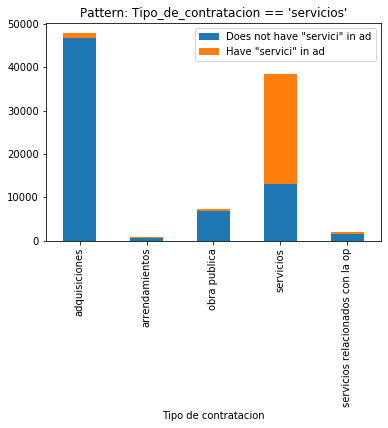

In [77]:
bar_plot_one_item(df,'Tipo de contratacion','Most_used_description_word_servici',"Pattern: Tipo_de_contratacion == 'servicios'",'Does not have "servici" in ad','Have "servici" in ad')

# Visualization with 2 categorical items

# Visulization with 3 categorical items

In [160]:
import plotly.express as px

def plot_three_categories(data):
    df = data.copy()
    # Simplify the graph for the number of unique values
    df['Tipo de contratacion'][(df['Tipo de contratacion'] != 'obra publica')] = 'otros'
    df['Caracter del procedimiento'][(df['Caracter del procedimiento'] != 'otro')] = 'nacional_int'
    df['Plantilla'][(df['Plantilla'] != 'adjudicacion')] = 'otro'
    df['Articulo'][(df['Articulo'] != 'no')] = '43/42/41'
    # Fill missing values with mode
    df = df.fillna(df.mode().iloc[0])
    # Get the frquencies
    temp = df.groupby(['Plantilla','Caracter del procedimiento','Tipo de contratacion','Articulo'], as_index=False).agg({'Operador':['count']})
    temp.columns = list(map(''.join, temp.columns.values))
    temp.columns = [*temp.columns[:-1], 'count']
    # Create the treemap
    fig = px.treemap(temp,
                 path=['Caracter del procedimiento','Tipo de contratacion','Articulo'],
                 values = 'count',
                 color='count')
    fig.show()

    return None

In [161]:
plot_three_categories(df)

In [121]:
df.groupby('Articulo').count()

,Caracter del procedimiento,Forma del procedimiento,Operador,Correo electronico,Entidad federativa,Tipo de contratacion,Plantilla,Forma_Procedimiento_Presencial,Forma_Procedimiento_Electronica,Forma_Procedimiento_Mixta,...,Most_used_description_word_servici,Most_used_description_word_adquisicion,Most_used_description_word_material,Mes_pub,Dia_pub,Hora_pub,Min_pub,Most_used_UC_word_gyr,Most_used_UC_word_material,Most_used_UC_word_general
Articulo,,,,,,,,,,,,,,,,,,,,,
41,47882,47882,47895,47895,21409,47894,47895,47895,47895,47895,...,47895,47895,47895,47895,47895,47895,47895,47895,47895,47895
42,30664,30666,30674,30674,10962,30674,30674,30674,30674,30674,...,30674,30674,30674,30674,30674,30674,30674,30674,30674,30674
43,4593,4593,4594,4594,2668,4594,4594,4594,4594,4594,...,4594,4594,4594,4594,4594,4594,4594,4594,4594,4594
no,561,561,561,561,153,561,561,561,561,561,...,561,561,561,561,561,561,561,561,561,561
